In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')

from astroLuSt.database_interface import alerceinterface as aldiai
from astroLuSt.database_interface import eleanorinterface as aldiei
from astroLuSt.database_interface import gaiainterface as aldigi
from astroLuSt.database_interface import lightkurveinterface as aldili
from astroLuSt.database_interface import simbadinterface as aldisi

import importlib
importlib.reload(aldiai)
importlib.reload(aldiei)
importlib.reload(aldigi)
importlib.reload(aldili)
importlib.reload(aldisi)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')



2023-12-19 09:39:01.300452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
targets = [
    'KIC 5006817', 'RR Lyr', 'TV Boo'
]

# SimbadDatabaseInterface

In [3]:
SDI = aldisi.SimbadDatabaseInterface()
ids = SDI.get_ids(
    targets
)
tics = SDI.df_ids['TIC']
print(tics)

/home/lukas/github/astroLuSt/demos/../astroLuSt/database_interface/simbadinterface.py:105: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_ids = pd.unique(input_ids)


INFO: catalog is None. Corresponding id: G 125-7
0    122447138
1    159717514
2    168709463
Name: TIC, dtype: object


# EleanorDatabaseInterface

Most recent sector available =  71
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 14...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1918k  100 1918k    0     0  1073k      0  0:00:01  0:00:01 --:--:-- 1073k


Calculating Cadences...
Assuring Quality Flags...
Making CBVs...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4905k  100 4905k    0     0  1787k      0  0:00:02  0:00:02 --:--:-- 1787k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4905k  100 4905k    0     0  1182k      0  0:00:04  0:00:04 --:--:-- 1182k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4750k  100 4750k    0     0  1698k      0  0:00:02  0:00:02 --:--:-- 1698k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4826k  100 4826k    0     0  1635k      0  0:00:02  0:00:02 --:--:-- 1635k
  % Total    % Received % Xferd  Average Speed   Tim

Success! Sector 14 now available.
INFO(EleanorDatabaseInterface.download()): Extracting chunk 1/1 (0/3)
Found star in Sector(s) 14 40 41


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Found star in Sector(s) 14 40 41


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Found star in Sector(s) 16 23 49 50


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:857: RuntimeWarning: invalid value encountered in divide
  bkgvar = np.nanstd(self.bkg_tpf, axis=(1,2))/(np.nansum(self.bkg_tpf, axis=(1,2)))
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/pyt

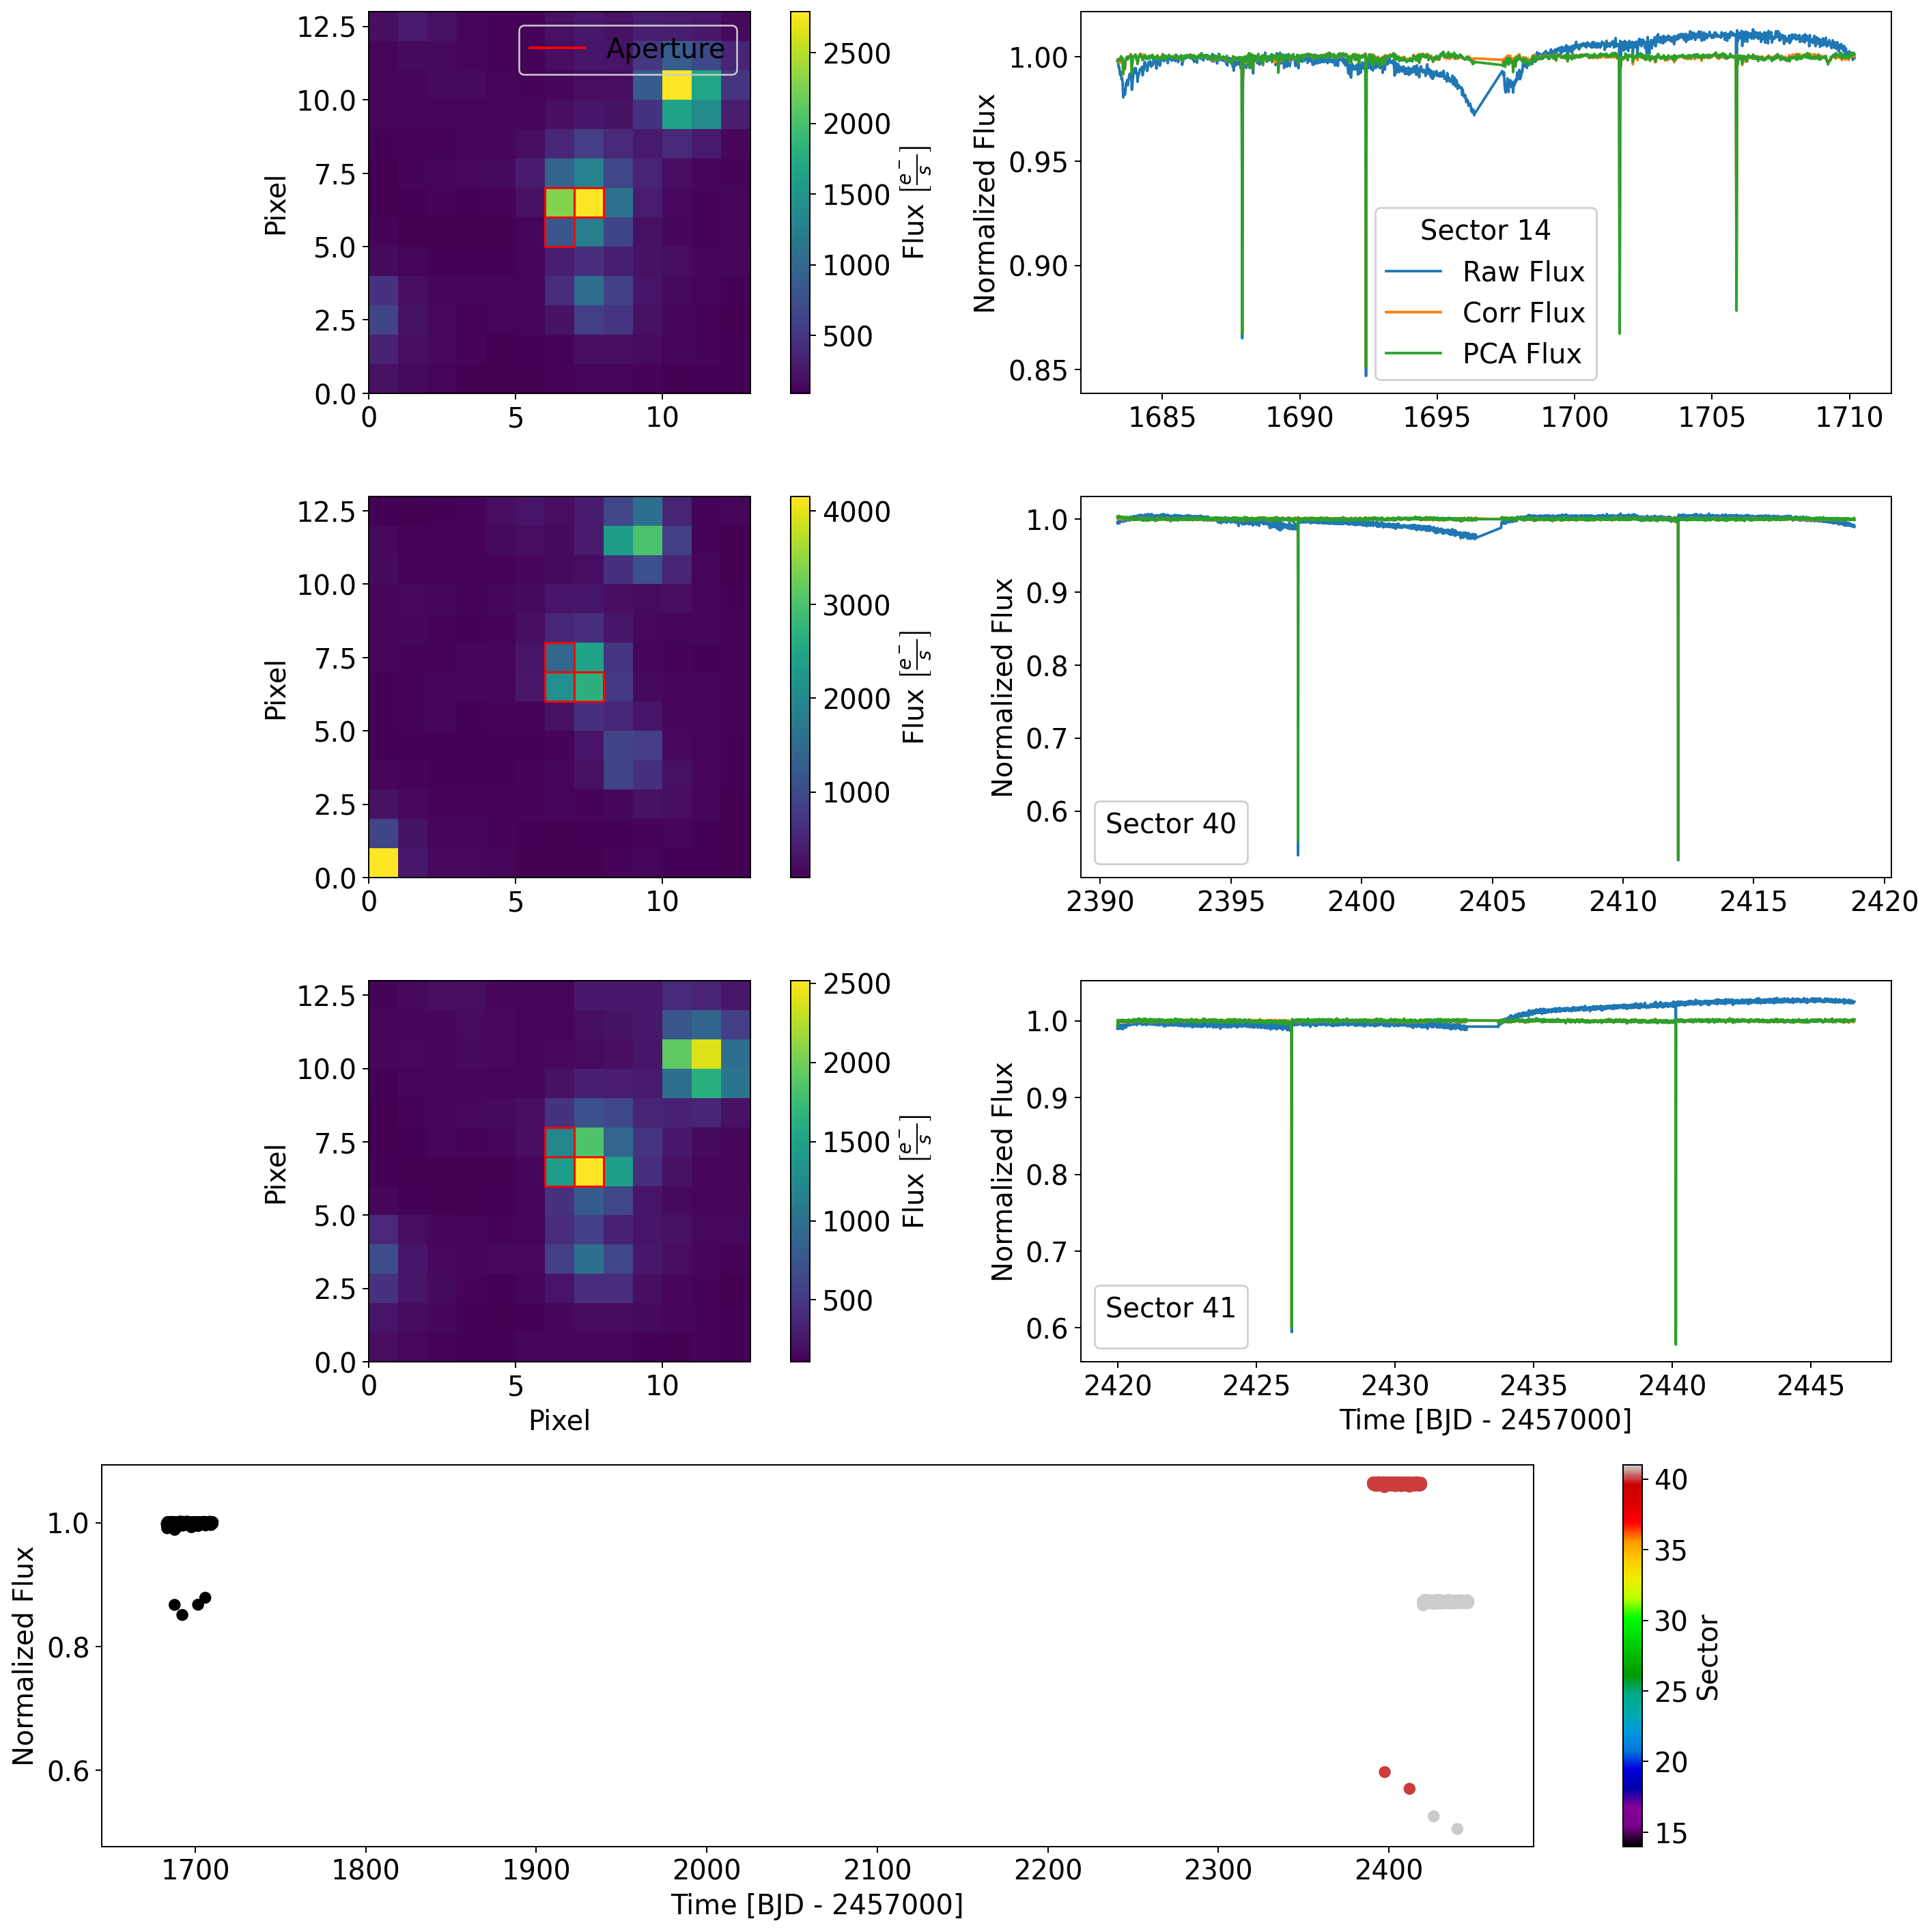

,exception,prefix,suffix,file,line,problem line,error msg,time


In [5]:
import eleanor
eleanor.Update(sector=14)

EDI = aldiei.EleanorDatabaseInterface(
    n_jobs=1,
    redownload=True,
    verbose=3,
)

lcs, headers, tpfs, aperture_masks = EDI.download(
    # sectors=[14,20],
    sectors='all',
    source_ids=[{'tic':tic} for tic in tics[:]],
    # source_ids=[{'gaia': '2249474965068982272'}], #error for sector 14
    tpfs2store=slice(1), store_aperture_masks=True,
    # tpfs2store=None, store_aperture_masks=True,
    n_chunks=1,
    targetdata_kwargs=dict(do_pca=True, aperture_mode='small'),
    # custom_aperture_kwargs=dict(shape='rectangle', h=3, w=4), #in case you want to use a custom aperture
    save_kwargs=dict(directory='./data/', pd_savefunc='to_parquet'),
)

fig, axs = EDI.plot_result(
    lcs=lcs[0],
    headers=headers[0],
    tpfs=tpfs[0],
    aperture_masks=aperture_masks[0],
)

plt.show()


# GaiaDatabaseInterface

In [ ]:
GID = aldigi.GaiaDatabaseInterface()
GID.gaia_crendetials = "../credentials_gaia.txt"

filter = "(jobs['phase'] == 'ERROR')"
GID.remove_all_jobs(pd_filter=filter, login_before=False, logout_after=False)


# AlerceDatabaseInterface

In [ ]:
importlib.reload(aldiai)

ADI = aldiai.AlerceDatabaseInterface()

df = pd.DataFrame(
    data=np.array([
        [10054,	12.39495833, 27.02213889,],
        # [10088,	353.7751667, np.inf,],#41.10291667,],
        [10140,	16.294625,	 34.21841667,],
        # [10147,	359.6756667, 41.48880556,],
    ]),
    columns=['id', 'ra', 'dec']
)

df_ztf = ADI.crossmerge_by_coordinates(
    df_left=df,
    ra_colname='ra', dec_colname='dec', radius=1,
    sleep=2E-3,
    n_jobs=1, verbose=2
)

print(ADI.df_error_msgs_crossmerge)

ADI.download_lightcurves(
    df_ztf['oid_ztf'],
    save=False,
    # save='./data/',
    redownload=False,
    plot_result=True, save_plot=False, close_plots=False,
    sleep=2E-3,
    n_jobs=1, verbose=2
)
print(ADI.df_error_msgs_lcdownload)

# LightkurveInterface

In [ ]:

importlib.reload(aldili)
LKI = aldili.LightkurveInterface(
    tics=tics.astype(np.float64)
)

LKI.download_lightcurves_tess(
    #saving data
    save=False,
    sectors='all',
    quality_expression="(datum.quality == 0)",
    include_aperture=False, include_tpf=False,
    #plotting
    plot_result=True,
    aperture_detail=50, ylims=None,
    fontsize=16, figsize=(16,9),
    save_plot=False,
    sleep=0,
    n_jobs=1, n_chunks=1,
    verbose=2
)

print(LKI.df_extraction_summary)